IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA COLLECTION AND PREPROCESSING

In [49]:
data=pd.read_csv('/content/stress.csv')

In [50]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data.shape

(374, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [51]:
data = data.fillna("Nothing")
data.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing


In [52]:
data['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [53]:
data["BMI Category"] = data["BMI Category"].replace("Normal Weight","Normal")

In [54]:
duplicates = data[data.duplicated()]

In [55]:
duplicates

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [56]:
no_duplicates = data.drop_duplicates(subset=['Person ID', 'Gender'])

In [57]:
data['Stress Level'].value_counts()

,count
Stress Level,
3,71
8,70
4,70
5,67
7,50
6,46


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [22]:
label_encoder=LabelEncoder()

In [58]:
cat_cols=['Gender','Occupation','BMI Category','Sleep Disorder']

In [59]:
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

data.tail(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,373,0,59,5,8.1,9,75,3,2,140/95,68,7000,2
373,374,0,59,5,8.1,9,75,3,2,140/95,68,7000,2


In [60]:
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type
data[['Systolic BP', 'Diastolic BP']] = data[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)

# Drop the original 'Blood Pressure' column
data = data.drop('Blood Pressure', axis=1)

data.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80


In [61]:
data.drop('Person ID', axis=1, inplace=True)

Text(0, 0.5, 'Count')

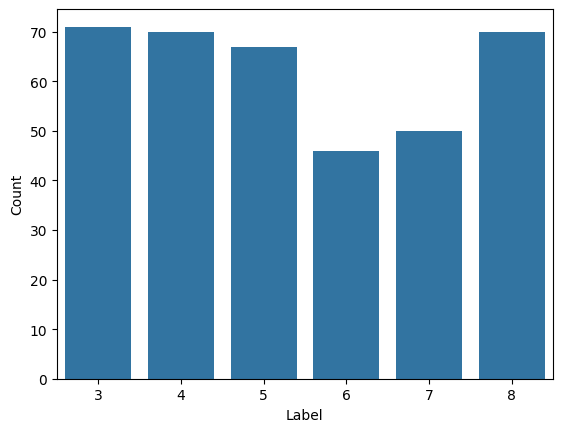

In [62]:
sns.countplot(x='Stress Level', data=data)
plt.xlabel('Label')
plt.ylabel('Count')

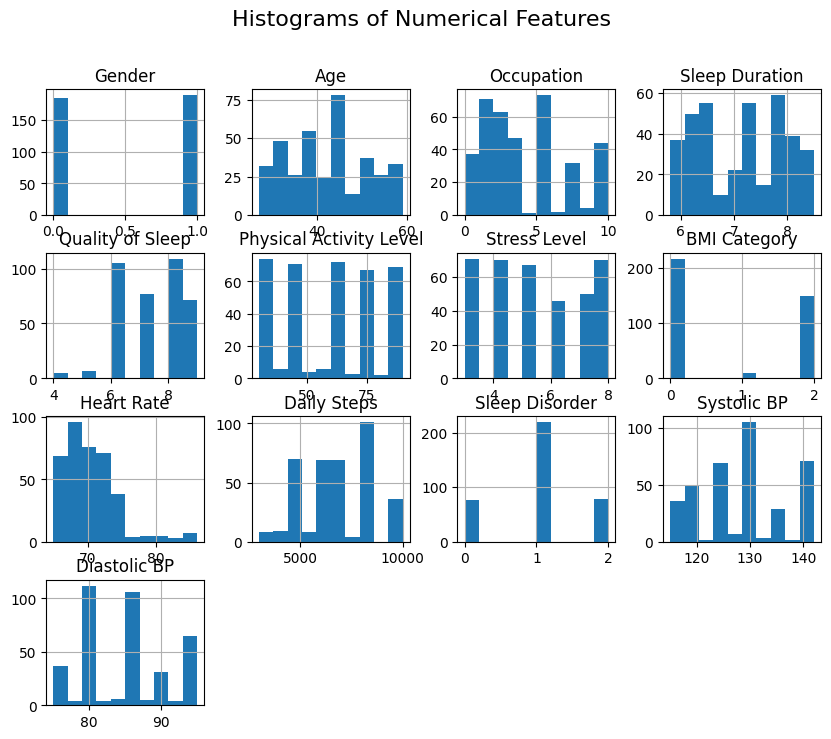

In [28]:
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

<Axes: >

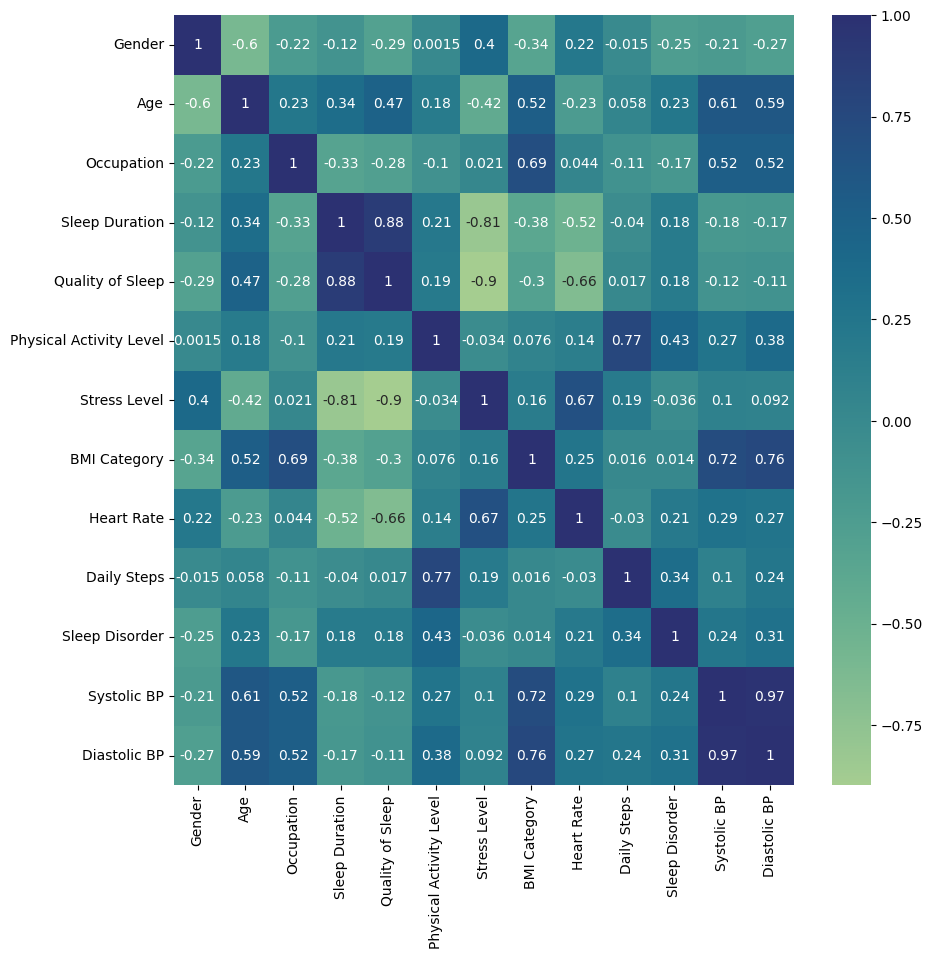

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap = 'crest',cbar=True, annot = True)

No correlation with Target column: Stress level:

"Sleep Disorder"
"Physical Activity Level".

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [64]:
models=[LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]

In [65]:
def compare_models_cross_validation():
    for model in models:
        cv_score=cross_val_score(model,x,y,cv=5)
        mean_accuracy=sum(cv_score)/len(cv_score)
        mean_accuracy=mean_accuracy*100
        mean_accuracy=round(mean_accuracy,2)
        print('Cross Validation accuracies for the',model,'=',cv_score)
        print('Accuracy score of the ',model,'=',mean_accuracy,'%')

In [67]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression() = [0.48       0.8        0.54666667 0.38666667 0.37837838]
Accuracy score of the  LogisticRegression() = 51.83 %
Cross Validation accuracies for the RandomForestClassifier() = [0.89333333 1.         0.94666667 0.94666667 0.82432432]
Accuracy score of the  RandomForestClassifier() = 92.22 %
Cross Validation accuracies for the DecisionTreeClassifier() = [0.88       1.         0.97333333 0.94666667 0.75675676]
Accuracy score of the  DecisionTreeClassifier() = 91.14 %
Cross Validation accuracies for the SVC() = [0.4        0.36       0.53333333 0.56       0.48648649]
Accuracy score of the  SVC() = 46.8 %
Cross Validation accuracies for the GaussianNB() = [0.6        0.90666667 0.94666667 0.94666667 0.81081081]
Accuracy score of the  GaussianNB() = 84.22 %
Cross Validation accuracies for the KNeighborsClassifier() = [0.53333333 0.98666667 0.92       0.94666667 0.81081081]
Accuracy score of the  KNeighborsClassifier() = 83.95 %


As we can Check Random Forest Classifier And Decision Tree Classifier has HighesT Accuracy Score of 92% among all Models

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {
    'n_estimators': [50,75,100,150,200],
    'max_depth': [None,5,8,10,12,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation score:  0.9382342342342342


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
model=RandomForestClassifier(n_estimators=150,min_samples_split=5,min_samples_leaf=1,max_depth=10)

In [72]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=150)

In [73]:
train_pred=model.predict(x_train)

In [74]:
train_accuracy=accuracy_score(y_train,train_pred)
train_accuracy

0.9966555183946488

In [75]:
test_pred=model.predict(x_test)

In [76]:
test_accuracy=accuracy_score(y_test,test_pred)
test_accuracy

0.9866666666666667

In [77]:
report=classification_report(y_test,test_pred)
print(report)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        14
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        12
           8       0.94      1.00      0.97        17

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



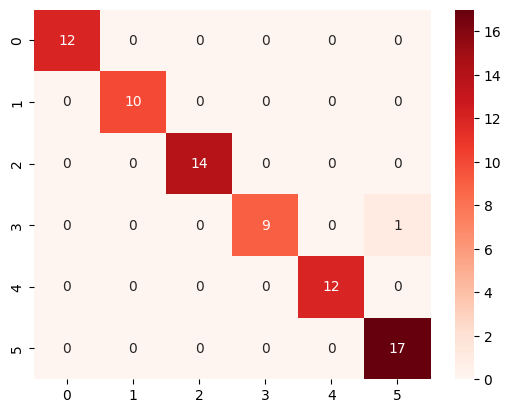

In [78]:
cf_matrix=confusion_matrix(y_test,test_pred)
sns.heatmap(cf_matrix,cmap='Reds',annot=True,fmt='d')
plt.show()

In [89]:
def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    print( "['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']")
    occupation = int(input("Occupation (encoded): "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    quality_of_sleep = int(input("Quality of Sleep (1-10): "))
    bmi_category = int(input("BMI Category (Underweight: 1, Normal: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    systolic_bp = int(input("Systolic Blood Pressure: "))
    diastolic_bp = int(input("Diastolic Blood Pressure: "))

    return np.array([[gender, age, occupation, sleep_duration, quality_of_sleep, bmi_category, heart_rate, daily_steps, systolic_bp, diastolic_bp]])

In [92]:
def predict_stress_level():
    user_input = get_user_input()
    prediction = model.predict(user_input)
    print(f"The predicted stress level is: {prediction[0]}")
    if prediction[0]<5:
      print('LOW STRESS LEVEL')
    elif prediction[0]>=5 and prediction[0]<=7:
      print('MODERATE STRESS LEVEL')
    else:
      print('HIGH STRESS LEVEL')

In [93]:
predict_stress_level()

Gender (Male: 1, Female: 0): 1
Age: 28
['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']
Occupation (encoded): 1
Sleep Duration (hours): 6.2
Quality of Sleep (1-10): 8
BMI Category (Underweight: 1, Normal: 2, Overweight: 3): 2
Heart Rate (bpm): 75
Daily Steps: 10000
Systolic Blood Pressure: 125
Diastolic Blood Pressure: 80
The predicted stress level is: 8
HIGH STRESS LEVEL
